In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5099999999999998, 1.53, 1.55, 1.57, 1.59, 1.6099999999999999, 1.6300000000000001, 1.65, 1.67, 1.69, 1.71, 1.73, 1.75, 1.77, 1.79, 1.81, 1.83, 1.85, 1.87, 1.89, 1.9100000000000001, 1.93, 1.95, 1.97, 1.9900000000000002, 2.0100000000000002, 2.03, 2.05, 2.0700000000000003, 2.09, 2.1100000000000003, 2.13, 2.1500000000000004, 2.17, 2.19, 2.21, 2.23, 2.25, 2.27, 2.29, 2.3099999999999996, 2.33, 2.3499999999999996, 2.37, 2.39, 2.41, 2.43, 2.45, 2.4699999999999998, 2.49, 2.5100000000000002, 2.5300000000000002, 2.55, 2.57, 2.59, 2.61, 2.63, 2.65, 2.67, 2.69, 2.71, 2.73, 2.75, 2.7700000000000005, 2.79, 2.81, 2.83, 2.85, 2.87, 2.89, 2.91, 2.9299999999999997, 2.95, 2.97, 2.99, 3.01, 3.0300000000000002, 3.0500000000000003, 3.07, 3.09, 3.1100000000000003, 3.13, 3.1500000000000004, 3.17, 3.1900000000000004, 3.21, 3.2300000000000004, 3.25, 3.27, 3.29, 3.3099999999999996, 3.3300000000000005, 3.3499999999999996, 3.37, 3.39, 3.41, 3.43, 3.4499999999999997, 3.4699999999999998, 3.49, 3.51, 3.5300000000000002, 3.5500000000000003, 3.5700000000000003, 3.59, 3.61, 3.63, 3.6500000000000004, 3.67, 3.6899999999999995, 3.7100000000000004, 3.7299999999999995, 3.75, 3.77, 3.79, 3.8100000000000005, 3.8299999999999996, 3.8499999999999996, 3.87, 3.8899999999999997, 3.91, 3.93, 3.95, 3.9699999999999998, 3.9899999999999998, 4.01, 4.03, 4.05, 4.07, 4.09, 4.109999999999999, 4.13, 4.15, 4.17, 4.19, 4.21, 4.23, 4.25, 4.2700000000000005, 4.29, 4.31, 4.33, 4.35, 4.37, 4.390000000000001, 4.409999999999999, 4.43, 4.45, 4.47, 4.49, 4.51, 4.53, 4.550000000000001, 4.569999999999999, 4.59, 4.61, 4.63, 4.65, 4.67, 4.6899999999999995, 4.71, 4.7299999999999995, 4.75, 4.7700000000000005, 4.789999999999999, 4.8100000000000005, 4.83, 4.85, 4.87, 4.89, 4.91, 4.930000000000001, 4.95, 4.97, 4.99]

start = X[0] - (X[2] - X[1])/2
stop = X[-1] + (X[2] - X[1])/2
bins = len(X)

In [3]:
# eventsCuts: isCMUL == True
# tracksCuts: -4.0 < eta < -2.5; pt > 0.5; 2° < thetaAbs < 10°
# pairsCuts: -2.8 < rapidity < -2.5

Y_OS = [2025.0, 1955.0, 2005.0, 2056.0, 1905.0, 2032.0, 2022.0, 1884.0, 1944.0, 1964.0, 1888.0, 1989.0, 1990.0, 1844.0, 1971.0, 1885.0, 1836.0, 1840.0, 1790.0, 1818.0, 1812.0, 1742.0, 1768.0, 1720.0, 1672.0, 1677.0, 1656.0, 1631.0, 1565.0, 1530.0, 1591.0, 1544.0, 1480.0, 1536.0, 1446.0, 1415.0, 1379.0, 1392.0, 1410.0, 1412.0, 1312.0, 1259.0, 1251.0, 1280.0, 1235.0, 1131.0, 1154.0, 1135.0, 1196.0, 1119.0, 1098.0, 1057.0, 1058.0, 1061.0, 1076.0, 1024.0, 965.0, 1003.0, 979.0, 927.0, 960.0, 920.0, 941.0, 871.0, 910.0, 878.0, 884.0, 886.0, 919.0, 1042.0, 1070.0, 1112.0, 1214.0, 1325.0, 1446.0, 1751.0, 2055.0, 2332.0, 2683.0, 2953.0, 2864.0, 2789.0, 2545.0, 1956.0, 1534.0, 1194.0, 846.0, 699.0, 578.0, 516.0, 470.0, 441.0, 438.0, 431.0, 384.0, 428.0, 397.0, 393.0, 365.0, 375.0, 364.0, 355.0, 353.0, 357.0, 337.0, 339.0, 355.0, 372.0, 355.0, 349.0, 347.0, 338.0, 289.0, 300.0, 312.0, 266.0, 276.0, 250.0, 244.0, 237.0, 263.0, 219.0, 227.0, 199.0, 201.0, 207.0, 212.0, 230.0, 199.0, 197.0, 223.0, 211.0, 188.0, 166.0, 204.0, 188.0, 179.0, 186.0, 167.0, 169.0, 197.0, 174.0, 159.0, 174.0, 173.0, 153.0, 162.0, 151.0, 159.0, 132.0, 158.0, 150.0, 156.0, 127.0, 125.0, 141.0, 145.0, 136.0, 137.0, 127.0, 119.0, 116.0, 124.0, 109.0, 137.0, 111.0, 118.0, 121.0, 107.0, 111.0, 96.0, 98.0, 94.0, 102.0, 108.0]

vMass_OS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_OS.fill(X, weight = Y_OS)

Y_LS = [451.0, 474.0, 484.0, 455.0, 449.0, 455.0, 453.0, 465.0, 461.0, 425.0, 416.0, 436.0, 409.0, 427.0, 423.0, 406.0, 397.0, 419.0, 399.0, 370.0, 366.0, 390.0, 336.0, 343.0, 348.0, 349.0, 375.0, 339.0, 335.0, 363.0, 358.0, 293.0, 311.0, 297.0, 303.0, 281.0, 312.0, 282.0, 263.0, 294.0, 285.0, 290.0, 272.0, 274.0, 282.0, 264.0, 239.0, 227.0, 252.0, 259.0, 249.0, 243.0, 226.0, 249.0, 188.0, 216.0, 231.0, 238.0, 243.0, 248.0, 204.0, 233.0, 242.0, 191.0, 205.0, 208.0, 215.0, 198.0, 188.0, 179.0, 189.0, 180.0, 199.0, 168.0, 173.0, 171.0, 159.0, 188.0, 198.0, 147.0, 166.0, 158.0, 143.0, 178.0, 150.0, 157.0, 141.0, 137.0, 154.0, 142.0, 164.0, 158.0, 151.0, 167.0, 140.0, 142.0, 136.0, 143.0, 149.0, 131.0, 107.0, 143.0, 135.0, 114.0, 128.0, 138.0, 128.0, 132.0, 108.0, 113.0, 113.0, 114.0, 114.0, 119.0, 85.0, 102.0, 107.0, 121.0, 112.0, 95.0, 109.0, 100.0, 89.0, 102.0, 114.0, 97.0, 107.0, 107.0, 94.0, 83.0, 101.0, 81.0, 110.0, 98.0, 86.0, 81.0, 72.0, 80.0, 79.0, 92.0, 88.0, 95.0, 85.0, 77.0, 88.0, 75.0, 85.0, 78.0, 85.0, 69.0, 86.0, 81.0, 73.0, 79.0, 75.0, 72.0, 62.0, 62.0, 71.0, 82.0, 91.0, 78.0, 70.0, 64.0, 61.0, 80.0, 60.0, 64.0, 56.0, 64.0, 70.0, 69.0, 66.0, 57.0, 52.0]

vMass_LS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_LS.fill(X, weight = Y_LS)

Y_JPsi = [2.0, 4.0, 7.0, 3.0, 3.0, 9.0, 5.0, 4.0, 6.0, 5.0, 10.0, 7.0, 4.0, 7.0, 13.0, 14.0, 14.0, 14.0, 10.0, 20.0, 12.0, 15.0, 15.0, 25.0, 24.0, 29.0, 31.0, 28.0, 35.0, 39.0, 40.0, 44.0, 49.0, 57.0, 57.0, 56.0, 60.0, 66.0, 69.0, 68.0, 74.0, 78.0, 79.0, 81.0, 96.0, 105.0, 108.0, 123.0, 138.0, 133.0, 118.0, 158.0, 158.0, 169.0, 199.0, 192.0, 201.0, 203.0, 212.0, 262.0, 271.0, 286.0, 335.0, 416.0, 455.0, 502.0, 597.0, 727.0, 750.0, 1015.0, 1150.0, 1374.0, 1818.0, 2021.0, 2633.0, 3334.0, 4050.0, 5252.0, 6387.0, 7198.0, 7691.0, 7196.0, 5852.0, 4382.0, 2767.0, 1601.0, 804.0, 397.0, 213.0, 80.0, 45.0, 42.0, 16.0, 14.0, 8.0, 6.0, 8.0, 8.0, 5.0, 3.0, 5.0, 0.0, 2.0, 2.0, 1.0, 0.0, 1.0, 0.0, 3.0, 1.0, 0.0, 0.0, 2.0, 0.0, 1.0, 2.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

vMass_JPsi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_JPsi.fill(X, weight = Y_JPsi)

Y_Psi = [0.0, 0.0, 1.0, 2.0, 2.0, 1.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 1.0, 0.0, 0.0, 3.0, 1.0, 6.0, 2.0, 0.0, 4.0, 4.0, 4.0, 2.0, 1.0, 3.0, 6.0, 2.0, 5.0, 7.0, 4.0, 8.0, 9.0, 4.0, 3.0, 5.0, 5.0, 11.0, 10.0, 7.0, 9.0, 9.0, 13.0, 14.0, 12.0, 7.0, 12.0, 13.0, 22.0, 20.0, 16.0, 19.0, 23.0, 32.0, 29.0, 30.0, 26.0, 32.0, 23.0, 29.0, 23.0, 33.0, 37.0, 40.0, 45.0, 46.0, 42.0, 44.0, 45.0, 49.0, 61.0, 80.0, 51.0, 69.0, 71.0, 69.0, 83.0, 75.0, 77.0, 78.0, 96.0, 95.0, 102.0, 134.0, 116.0, 120.0, 118.0, 132.0, 176.0, 165.0, 185.0, 212.0, 238.0, 279.0, 299.0, 352.0, 374.0, 457.0, 547.0, 625.0, 704.0, 875.0, 1054.0, 1237.0, 1522.0, 1933.0, 2322.0, 2893.0, 3390.0, 3831.0, 3897.0, 3607.0, 3046.0, 2070.0, 1351.0, 809.0, 381.0, 219.0, 96.0, 49.0, 31.0, 17.0, 7.0, 9.0, 6.0, 4.0, 2.0, 5.0, 2.0, 2.0, 0.0, 0.0, 2.0, 4.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

vMass_Psi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_Psi.fill(X, weight = Y_Psi)

Y_MC = [2.0, 4.0, 8.0, 5.0, 5.0, 10.0, 5.0, 4.0, 6.0, 6.0, 13.0, 7.0, 5.0, 7.0, 13.0, 17.0, 15.0, 20.0, 12.0, 20.0, 16.0, 19.0, 19.0, 27.0, 25.0, 32.0, 37.0, 30.0, 40.0, 46.0, 44.0, 52.0, 58.0, 61.0, 60.0, 61.0, 65.0, 77.0, 79.0, 75.0, 83.0, 87.0, 92.0, 95.0, 108.0, 112.0, 120.0, 136.0, 160.0, 153.0, 134.0, 177.0, 181.0, 201.0, 228.0, 222.0, 227.0, 235.0, 235.0, 291.0, 294.0, 319.0, 372.0, 456.0, 500.0, 548.0, 639.0, 771.0, 795.0, 1064.0, 1211.0, 1454.0, 1869.0, 2090.0, 2704.0, 3403.0, 4133.0, 5327.0, 6464.0, 7276.0, 7787.0, 7291.0, 5954.0, 4516.0, 2883.0, 1721.0, 922.0, 529.0, 389.0, 245.0, 230.0, 254.0, 254.0, 293.0, 307.0, 358.0, 382.0, 465.0, 552.0, 628.0, 709.0, 875.0, 1056.0, 1239.0, 1523.0, 1933.0, 2323.0, 2893.0, 3393.0, 3832.0, 3897.0, 3607.0, 3048.0, 2070.0, 1352.0, 811.0, 381.0, 219.0, 97.0, 49.0, 31.0, 17.0, 7.0, 9.0, 7.0, 5.0, 2.0, 5.0, 2.0, 2.0, 0.0, 0.0, 2.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

vMass_MC = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_MC.fill(X, weight = Y_MC)

Hist(Regular(175, 1.5, 5, name='$m_{\\mu \\mu}$', label='X'), storage=Double()) # Sum: 117439.0

In [4]:
def CB2(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def NA60(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    return np.piecewise(x, 
                        [(x - mu)/sig < alphaL, 
                         ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                         (x - mu)/sig > alphaR],
                        [lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1L * (alphaL - (x - mu)/sig)**(p2L - p3L * np.sqrt(alphaL - (x - mu)/sig)))**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1R * ((x - mu)/sig - alphaR)**(p2R - p3R * np.sqrt((x - mu)/sig - alphaR)))**2)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

def test(x, y1, y2, y3, y4, y5):
    x0 = [1.5, 2.5, 3.45, 3.8, 5]
    return interp1d([*x0], [y1, y2, y3, y4, y5], kind = 'cubic', bounds_error = False, fill_value = "extrapolate")(x)

def test2(x, y1, y2, y3, y4, y5):
    return np.exp(test(x, y1, y2, y3, y4, y5))

In [5]:
def fixedFunc_JPsi(x, N1, mu1, sig1):
    return func_JPsi(x, N1, mu1, sig1, alphaL1, nL1, alphaR1, nR1)

def fixedFunc_Psi(x, N2, mu2, sig2):
    return func_Psi(x, N2, mu2, sig2, alphaL2, nL2, alphaR2, nR2)

def fixedFunc_MC(x, N1, mu1, sig1, N2, mu2, sig2):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2)

def fixedFunc_bckg(x, y1, y2, y3, y4, y5):
    return func_bckg(x, y1, y2, y3, y4, y5)

def fixedFitFunc(x,
                 N1, mu1, sig1,
                 N2, mu2, sig2,
                y1, y2, y3, y4, y5):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2) + fixedFunc_bckg(x, y1, y2, y3, y4, y5)

condition_x_range = lambda x_data: (x_data < 5.0)
func_JPsi = CB2
func_Psi = CB2
func_bckg = test2
func_MC = fixedFunc_MC
func = fixedFitFunc

In [6]:
x_data = np.array(X)
y_data = np.array(vMass_JPsi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

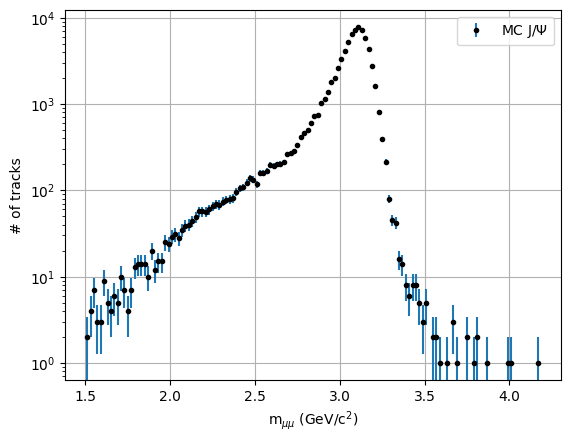

In [7]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [8]:
p0_JPsi = np.array([136241.85680339273, 3.1003675365856544, 0.0630318569252801, 0.993869592186634, 3.0340276033125493, 2.233482641523906, 2.705629560440874])

In [9]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_JPsi, pcov_JPsi, nfev_JPsi, fvec_JPsi, fjac_JPsi = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_JPsi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_JPsi))
print("pcov: \n", pcov_JPsi)
print("residual: \n", nfev_JPsi)

popt: 
 [7716.938734707804, 3.104561147743002, 0.059979635533761066, 0.806253524267356, 3.359005427267911, 2.7638558158703206, 2.203551123813448]
pcov: 
 [[ 6.06050808e+03  1.55392143e-02 -2.81969139e-02 -8.46221218e-03
  -8.13520405e-01 -1.04416988e+00  2.75717882e+00]
 [ 1.55392143e-02  7.48997269e-07 -4.05839349e-07 -1.11152207e-05
   3.73989753e-05 -1.06857934e-05  2.00016633e-05]
 [-2.81969139e-02 -4.05839349e-07  4.45654986e-07  7.98504920e-06
  -1.99155529e-05  1.96033735e-05 -4.53913711e-05]
 [-8.46221218e-03 -1.11152207e-05  7.98504920e-06  3.65729352e-04
  -1.75569839e-03  3.16784287e-04 -6.64553932e-04]
 [-8.13520405e-01  3.73989753e-05 -1.99155529e-05 -1.75569839e-03
   1.27578915e-02 -6.63079091e-04  1.21185817e-03]
 [-1.04416988e+00 -1.06857934e-05  1.96033735e-05  3.16784287e-04
  -6.63079091e-04  1.90904264e-02 -7.06725884e-02]
 [ 2.75717882e+00  2.00016633e-05 -4.53913711e-05 -6.64553932e-04
   1.21185817e-03 -7.06725884e-02  3.29944601e-01]]
residual: 
 {'nfev': 15, '

fit error : 77.8515911028334


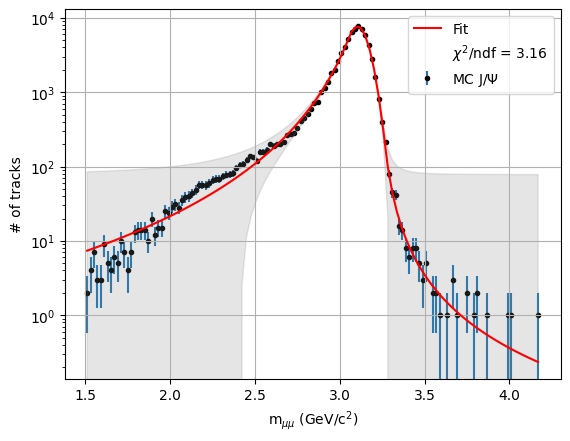

In [10]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_JPsi(x_fit, *popt_JPsi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_JPsi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_JPsi(x_data, *popt_JPsi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_JPsi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

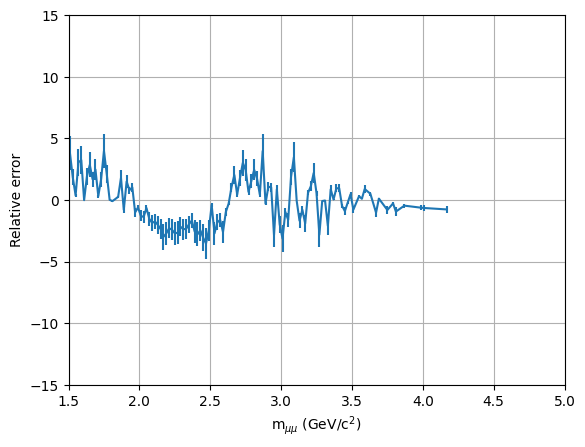

In [11]:
err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_JPsi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [12]:
x_data = np.array(X)
y_data = np.array(vMass_Psi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

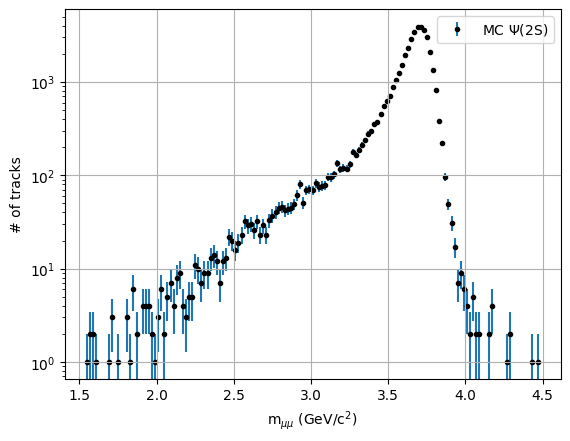

In [13]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [14]:
p0_Psi = np.array([67449.51297432544, 3.693248662583962, 0.06511527893660865, 0.9607870324016564, 2.849198115287005, 2.283717751711943, 2.5497581009488974])

In [15]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_Psi, pcov_Psi, nfev_Psi, fvec_Psi, fjac_Psi = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_Psi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_Psi))
print("pcov: \n", pcov_Psi)
print("residual: \n", nfev_Psi)

popt: 
 [3988.965180833942, 3.700877370341276, 0.06102709329790915, 0.7375210930275362, 3.2508316794598064, 2.6283147840594236, 2.7708797068448523]
pcov: 
 [[ 1.98598804e+03  1.11405982e-02 -1.96764552e-02 -1.20180914e-02
  -4.94333896e-01 -1.09933619e+00  4.35474597e+00]
 [ 1.11405982e-02  1.06159925e-06 -6.07555501e-07 -1.35552458e-05
   4.06605045e-05 -2.28138390e-05  7.05999017e-05]
 [-1.96764552e-02 -6.07555501e-07  6.59671358e-07  1.00595571e-05
  -2.18128116e-05  4.13817324e-05 -1.51846115e-04]
 [-1.20180914e-02 -1.35552458e-05  1.00595571e-05  3.57047340e-04
  -1.54703471e-03  5.61294783e-04 -1.92325892e-03]
 [-4.94333896e-01  4.06605045e-05 -2.18128116e-05 -1.54703471e-03
   1.06423423e-02 -9.70867866e-04  2.93383562e-03]
 [-1.09933619e+00 -2.28138390e-05  4.13817324e-05  5.61294783e-04
  -9.70867866e-04  2.91143742e-02 -1.59648062e-01]
 [ 4.35474597e+00  7.05999017e-05 -1.51846115e-04 -1.92325892e-03
   2.93383562e-03 -1.59648062e-01  1.06873901e+00]]
residual: 
 {'nfev': 13,

fit error : 44.576865058957424


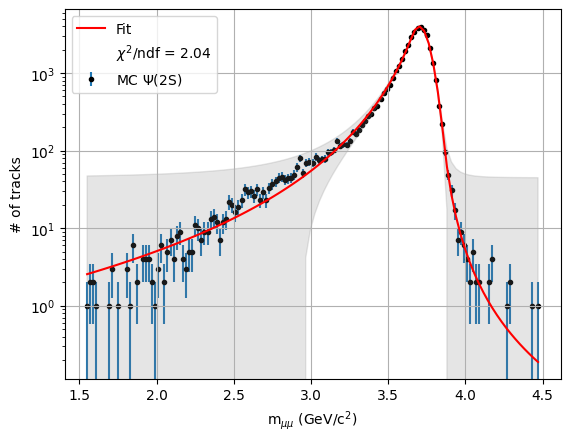

In [16]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_Psi(x_fit, *popt_Psi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_Psi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_Psi(x_data, *popt_Psi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_Psi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

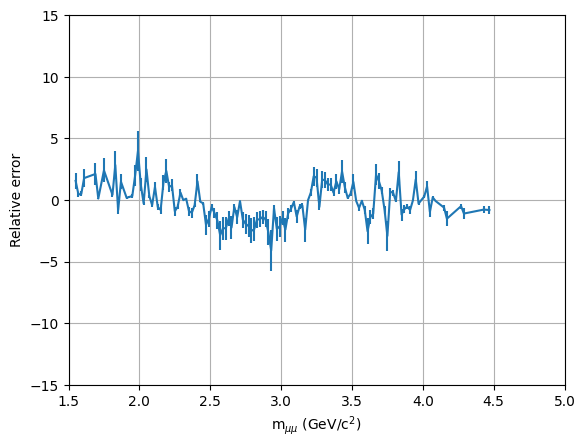

In [17]:
err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_Psi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [18]:
x_data = np.array(X)
y_data = np.array(vMass_MC)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

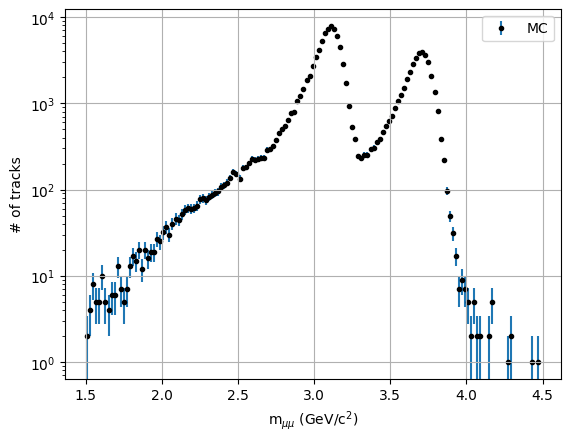

In [19]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [20]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1= popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

p0_MC = np.array([N1, mu1, sig1, N2, mu2, sig2])

In [21]:
def mklb(p0, var):
    return p0*(1-np.sign(p0)*var)

def mkub(p0, var):
    return p0*(1+np.sign(p0)*var)

varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0_MC[:3],varpks), *mklb(p0_MC[3:6],varpks)])
ub = np.array([*mkub(p0_MC[:3],varpks), *mkub(p0_MC[3:6],varpks)])
bounds = (lb,ub)

In [22]:
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, method = 'trf', full_output = True)
popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_MC))
print("pcov: \n", pcov_MC)
print("residual: \n", nfev_MC)

popt: 
 [7747.341211621319, 3.1042228908796012, 0.059978183037142696, 4004.339586070523, 3.7012271195373723, 0.060544388392448446]
pcov: 
 [[ 6.38283814e+03  1.25080943e-02 -2.73229340e-02 -3.42683586e+01
  -1.12935135e-03  1.34048684e-03]
 [ 1.25080943e-02  3.82521946e-07 -9.66523112e-08 -6.16998093e-05
   3.74127250e-09 -1.69114781e-09]
 [-2.73229340e-02 -9.66523112e-08  2.24936761e-07  1.05168494e-03
   2.97669898e-08 -3.74955230e-08]
 [-3.42683586e+01 -6.16998093e-05  1.05168494e-03  3.17391507e+03
   1.54240279e-02 -2.80024940e-02]
 [-1.12935135e-03  3.74127250e-09  2.97669898e-08  1.54240279e-02
   8.04419794e-07 -2.74283119e-07]
 [ 1.34048684e-03 -1.69114781e-09 -3.74955230e-08 -2.80024940e-02
  -2.74283119e-07  4.76669761e-07]]
residual: 
 {'nfev': 5, 'fvec': array([ 5.51810262,  3.07685395,  0.89107052,  2.64063491,  2.82089706,
        0.54730144,  3.20870651,  4.32077702,  2.91169298,  3.12238917,
        0.33046834,  2.934421  ,  4.63621608,  3.4028404 ,  1.0191394 ,
      

fit error : 97.75864773129675


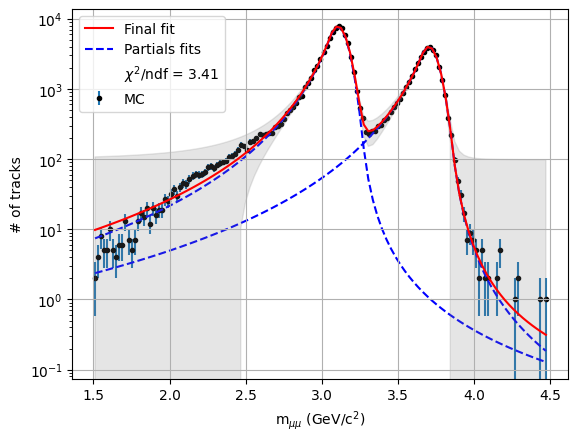

In [23]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_MC(x_fit, *popt_MC)
plt.plot(x_fit, y_fit, '-r', label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt_MC[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt_MC[3:6]), '--b', zorder = 1)

sigmas = np.diag(pcov_MC)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_MC(x_data, *popt_MC)) / y_error) ** 2)
ndf = len(x_data) + len(popt_MC) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_15328/4254452161.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))


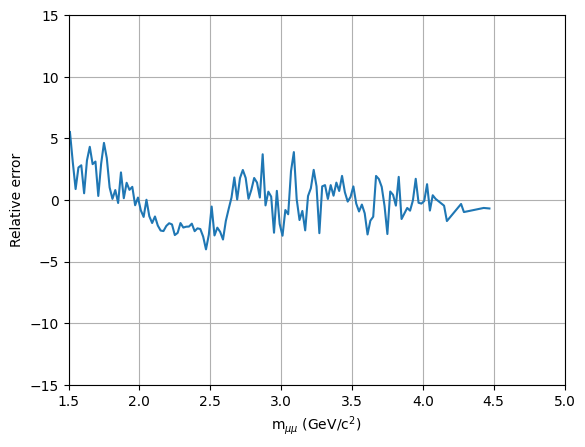

In [24]:
err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_MC["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [25]:
x_data = np.array(X)
y_data = np.array(vMass_LS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

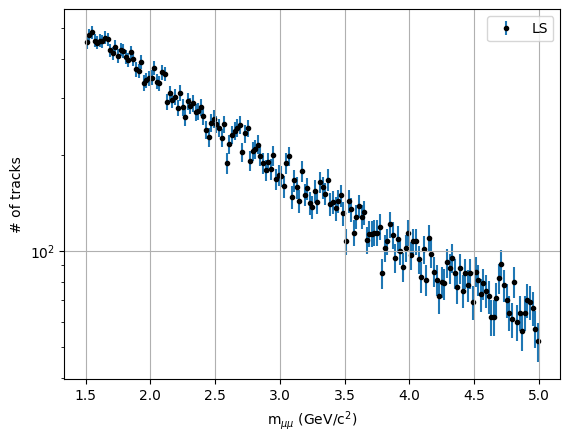

In [26]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [27]:
p0_bckg = np.array([1,1,1,1,1])

In [28]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_bckg, pcov_bckg, nfev_bckg, fvec_bckg, fjac_bckg = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_bckg, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_bckg))
print("pcov: \n", pcov_bckg)
print("residual: \n", nfev_bckg)

popt: 
 [6.194514662080089, 5.514073520688195, 4.89791039147048, 4.701675184297265, 4.097874084167095]
pcov: 
 [[ 3.09096433e-04 -5.83347584e-05  5.94987418e-05  2.61066840e-05
   9.86530775e-05]
 [-5.83347584e-05  7.77397716e-05  1.42074023e-05 -4.85506874e-06
   1.66242480e-05]
 [ 5.94987418e-05  1.42074023e-05  1.47620500e-04  1.08856994e-04
   2.47420181e-05]
 [ 2.61066840e-05 -4.85506874e-06  1.08856994e-04  1.56615073e-04
  -1.86509938e-04]
 [ 9.86530775e-05  1.66242480e-05  2.47420181e-05 -1.86509938e-04
   2.02743632e-03]]
residual: 
 {'nfev': 16, 'fvec': array([ 1.68950265e+00,  3.02109526e-01, -4.39248605e-01,  6.16822185e-01,
        6.15388418e-01,  4.61534466e-02, -1.41357702e-01, -9.71038853e-01,
       -1.06225288e+00,  3.58316864e-01,  5.21865379e-01, -7.20100945e-01,
        3.13811110e-01, -8.32765405e-01, -9.09236556e-01, -3.53835656e-01,
       -1.75479134e-01, -1.50471560e+00, -8.03145006e-01,  4.04322948e-01,
        3.48093367e-01, -1.13409924e+00,  1.45163165e+0

fit error : 0.05213931434044892


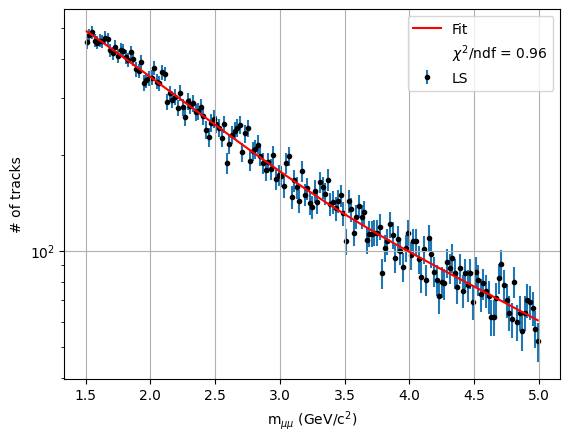

In [29]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_bckg(x_fit, *popt_bckg)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_bckg)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_bckg(x_data, *popt_bckg)) / y_error) ** 2)
ndf = len(x_data) + len(popt_bckg) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

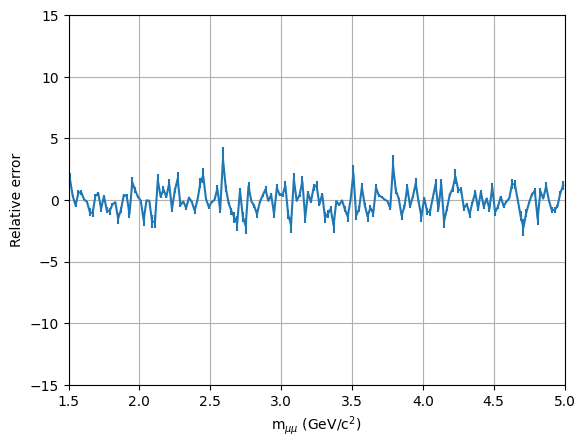

In [30]:
err = np.sqrt(nfev_bckg["fvec"]**2/(nfev_bckg["nfev"]-len(popt_bckg)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_bckg["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [31]:
x_data = np.array(X)
y_data = np.array(vMass_OS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

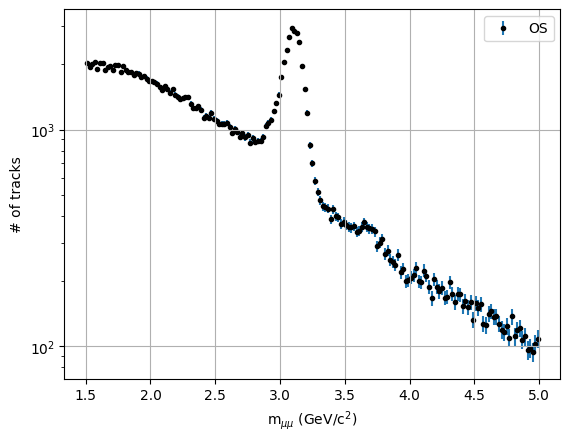

In [32]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [33]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1 = popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

y1 = popt_bckg[0]
y2 = popt_bckg[1]
y3 = popt_bckg[2]
y4 = popt_bckg[3]
y5 = popt_bckg[4]

p0 = np.array([N1, mu1, sig1, N2, mu2, sig2,  y1, y2, y3, y4, y5])

In [34]:
varbg = np.ones(np.shape(p0[6:]))*1# bg parameters variation factor around p0
varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0[:3],varpks), *mklb(p0[3:6],varpks), *mklb(p0[6:],varbg)])
ub = np.array([*mkub(p0[:3],varpks), *mkub(p0[3:6],varpks), *mkub(p0[6:],varbg)])
bounds = (lb,ub)

In [35]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, method = 'trf', full_output = True)
popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt))
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [2455.218807599401, 3.1057952431687683, 0.06546921892243075, 74.39525951355621, 3.6803747163348057, 0.06712980262769996, 7.602776126476867, 6.964164253699197, 5.877833317168683, 5.556089998013495, 4.561824758930135]
pcov: 
 [[ 8.31782495e+02  4.83307318e-03 -1.41439144e-02  5.18346452e+00
  -8.41031687e-03  1.58502434e-02 -1.20495526e-02 -4.10512859e-03
  -3.33022895e-02 -2.16037939e-02 -1.50764538e-02]
 [ 4.83307318e-03  7.42957770e-07 -3.27500170e-07 -3.12108021e-04
   7.07569179e-07 -1.28762698e-06  2.91550633e-07  1.30273389e-06
   2.68628660e-06  1.44865984e-06  1.76307361e-06]
 [-1.41439144e-02 -3.27500170e-07  8.38243433e-07  1.18509154e-03
  -1.30113310e-06  2.48388195e-06 -1.31630262e-06 -2.71798523e-06
  -7.04293363e-06 -4.21175128e-06 -3.56513985e-06]
 [ 5.18346452e+00 -3.12108021e-04  1.18509154e-03  1.19092186e+02
   1.59604783e-02 -6.84823655e-02 -8.83459897e-03 -7.00023601e-03
  -3.70320898e-02 -3.35446620e-02  1.55751079e-02]
 [-8.41031687e-03  7.07569179e-07 -1

fit error : 30.836294511230342


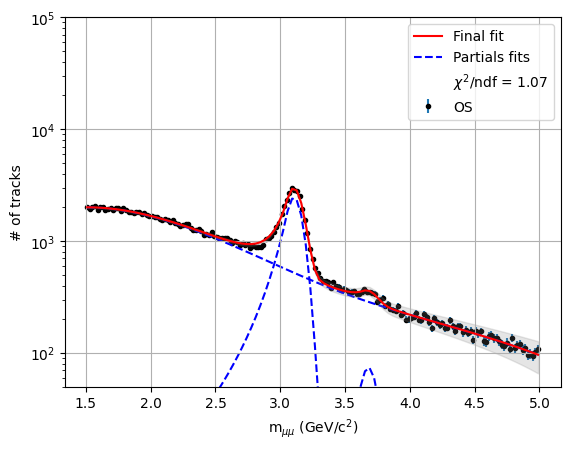

In [36]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-r', zorder = 2, label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt[3:6]), '--b', zorder = 1)
plt.plot(x_fit, fixedFunc_bckg(x_fit, *popt[6:]), '--b', zorder = 1)

sigmas = np.absolute(np.diag(pcov))
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func(x_data, *popt)) / y_error) ** 2)
ndf = len(x_data) + len(popt) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.legend()
plt.yscale('log')
plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.ylim(50, 100000)
plt.grid(True)

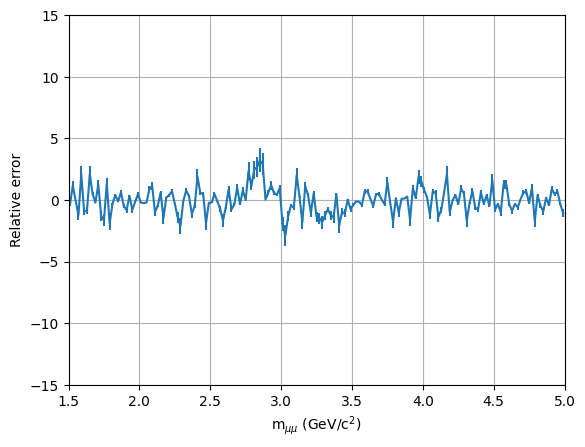

In [37]:
err = np.sqrt(nfev["fvec"]**2/(nfev["nfev"]-len(popt)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [38]:
def dCB2(pcov, x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )
    
    def dCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(-2*mu + 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: -AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def dCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL/(BL - (-mu + x)/sig)**nL, 
                             lambda x: np.exp(-(-mu + x)**2/(2*sig**2)), 
                             lambda x: AR/(BR + (-mu + x)/sig)**nR])

    def dCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(2*mu - 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])

    def dCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL*(-mu + x)/(sig**2*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: N*(-mu + x)**2*np.exp(-(-mu + x)**2/(2*sig**2))/sig**3, 
                             lambda x: AR*N*nR*(-mu + x)/(sig**2*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def IdCB2dx(x, *args):
        return quad(dCB2dx, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dN(x, *args):
        return quad(dCB2dN, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dmu(x, *args):
        return quad(dCB2dmu, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dsig(x, *args):
        return quad(dCB2dsig, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    return np.sqrt(IdCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * (((stop - start)/bins)/2)**2 \
                   + IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[0, 0] \
                   + IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[1, 1] \
                   + IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[2, 2] \
                   + 2 * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[0, 1])) \
                   + 2 * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[1, 2])) \
                   + 2 * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[2, 1])))

N_JPsi = quad(fixedFunc_JPsi, start, stop, args = (*popt[:3], ))[0] / ((stop - start)/bins)
err_JPsi = dCB2(pcov[:3, :3], x_data, *popt[:3], *popt_JPsi[3:])
print(r"N_JPsi = ", N_JPsi, " +/- ", err_JPsi, "(stat.)")

N_JPsi =  26111.617436940985  +/-  545.0298144134097 (stat.)
